# Importing modules

In [ ]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.9 MB 4.0 MB/s 
     |████████████████████████████████| 758 kB 48.8 MB/s 
     |████████████████████████████████| 275 kB 58.9 MB/s 
     |████████████████████████████████| 575 kB 40.7 MB/s 
     |████████████████████████████████| 3.6 MB 53.2 MB/s 
     |████████████████████████████████| 6.5 MB 36.4 MB/s 
     |████████████████████████████████| 9.9 MB 55.9 MB/s 
     |████████████████████████████████| 280 kB 52.3 MB/s 
     |████████████████████████████████| 261 kB 47.1 MB/s 
     |████████████████████████████████| 1.6 MB 5.3 MB/s 
     |████████████████████████████████| 132 kB 44.7 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=dc667c7ad312221cf47a2064cb53f5b18457de4dd0b16ca5daf64c296d574e2f
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfu

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import re

from pandas.io.formats.style_render import DataFrame
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from math import ceil
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import pickle
from interpret.glassbox import ExplainableBoostingClassifier


# from aix360.metrics import faithfulness_metric, monotonicity_metric


from interpret.provider import InlineProvider
from interpret import set_visualize_provider
from interpret import show
from interpret.perf import ROC

# set_visualize_provider(InlineProvider())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [ ]:
!cp /content/drive/Shareddrives/DM_Project/dataset/users_clustering.csv /content/
!cp /content/drive/Shareddrives/DM_Project/dataset/users_extended_clean.csv /content/

In [ ]:
users = pd.read_csv("users_clustering.csv")

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      11508 non-null  int64  
 1   name                    11508 non-null  object 
 2   lang                    11508 non-null  object 
 3   bot                     11508 non-null  int64  
 4   created_at              11508 non-null  object 
 5   statuses_count          11508 non-null  int64  
 6   reply_count_total       11508 non-null  float64
 7   favorite_count_total    11508 non-null  int64  
 8   num_hashtags_total      11508 non-null  int64  
 9   retweet_count_avg       11508 non-null  float64
 10  reply_count_avg         11508 non-null  float64
 11  favorite_count_avg      11508 non-null  float64
 12  num_hashtags_avg        11508 non-null  float64
 13  num_urls_avg            11508 non-null  float64
 14  num_mentions_avg        11508 non-null

## Train-test sets split

In [ ]:
users.drop(columns=['name', 'lang', 'created_at', "id"], axis=1, inplace=True)
# users = users[classification_cols+["bot"]]

In [ ]:
label = users.pop('bot')
train_set, test_set, train_label, test_label = train_test_split(users, label, stratify =label, test_size=0.20, random_state=42)
train_set

,statuses_count,reply_count_total,favorite_count_total,num_hashtags_total,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,...,reply_count_entropy,favorite_count_entropy,num_hashtags_entropy,num_mentions_entropy,retweet_count_per_day,reply_count_per_day,favorite_count_per_day,num_hashtags_per_day,avg_len,avg_spc_len
645,3090,7.0,1117,521,455.669983,0.002322,0.370481,0.172803,0.139967,0.517745,...,0.023662,0.980957,0.657790,1.372384,10028.065693,0.051095,8.153285,3.802920,74.116750,8.388060
684,52,0.0,44,8,32.770000,0.000000,0.440000,0.080000,0.120000,0.460000,...,-0.000000,0.857269,0.382543,1.200562,7.603248,0.000000,0.102088,0.018561,64.400000,3.840000
4300,66,3.0,717,176,204.108761,0.002266,0.541541,0.132931,0.151057,0.503021,...,0.023172,1.132299,0.557380,1.328115,239.150442,0.002655,0.634513,0.155752,84.810423,5.376888
2899,28,0.0,4,2,307.103448,0.000000,0.137931,0.068966,0.172414,0.482759,...,-0.000000,0.574828,0.216397,1.247424,8.555235,0.000000,0.003842,0.001921,64.448276,4.827586
9035,55,0.0,18,10,137.600000,0.000000,0.327273,0.181818,0.200000,0.600000,...,-0.000000,0.970062,0.716352,1.494333,7.262956,0.000000,0.017274,0.009597,57.527273,3.745455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5337,128,3.0,705,184,483.301370,0.002163,0.508291,0.132660,0.164384,0.498919,...,0.022265,1.076976,0.563522,1.332631,558.150708,0.002498,0.587011,0.153206,86.560202,5.727469
2410,50,2.0,4189,193,425.732211,0.001530,3.205050,0.147666,0.161438,0.525631,...,0.016517,1.092085,0.589942,1.375515,492.417699,0.001770,3.707080,0.170796,86.136190,5.589901
8568,378,0.0,95,42,268.687273,0.000000,0.345455,0.152727,0.156364,0.490909,...,-0.000000,0.923833,0.596771,1.326820,146.605159,0.000000,0.188492,0.083333,51.280000,5.178182
3330,26,0.0,4,2,1038.965517,0.000000,0.137931,0.068966,0.206897,0.620690,...,-0.000000,0.574828,0.362051,1.442165,37.289604,0.000000,0.004950,0.002475,53.275862,4.352941


In [ ]:
print(train_set.shape, train_label.shape)
print(test_set.shape, test_label.shape)

(9206, 27) (9206,)
(2302, 27) (2302,)


# Train EBN


In [ ]:
ebm = ExplainableBoostingClassifier()
ebm.fit(train_set, train_label)

ebm_global = ebm.explain_global()

show(ebm_global)

In [ ]:
ebm_local = ebm.explain_local(test_set[:10], test_label[:10])

show(ebm_local)

In [ ]:
ebm_perf = ROC(ebm.predict_proba).explain_perf(test_set, test_label)

show(ebm_perf)

# Measure preformances

In [ ]:
def print_metrics(train_label, train_pred, test_label, test_pred):

  print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred))
  print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred))

  print('Precision train set ', metrics.precision_score(train_label, train_pred))
  print('Precision test set ', metrics.precision_score(test_label, test_pred))

  print('Recall train set ', metrics.recall_score(train_label, train_pred))
  print('Recall test set ', metrics.recall_score(test_label, test_pred))

  print('F1 score train set ', metrics.f1_score(train_label, train_pred))
  print('F1 score train set ', metrics.f1_score(test_label, test_pred))

  print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred)[3])
  print('Support test set ', metrics.precision_recall_fscore_support(test_label, test_pred)[3])


def print_report(label, pred):
  print(classification_report(label, 
                              pred, 
                              target_names=['Real', 'Bot']))
  
def print_confusion_matrix(model, dataset, label):
  plot_confusion_matrix(model, dataset, label)
  plt.show()


def print_scatter(dataset, label, pred):
  pca = PCA(n_components=2)
  data = pca.fit_transform(dataset)
  fig, ax = plt.subplots(1, 2, figsize=(10,4))
  fig.tight_layout()
  ax[0].scatter(data[:, 0], data[:, 1], c=label, s=25, cmap='RdBu');
  ax[0].set_title("True labels")
  ax[1].scatter(data[:, 0], data[:, 1], c=pred, s=25, cmap='RdBu');
  ax[1].set_title("Predicted labels")
  plt.show()

In [ ]:
train_pred = ebm.predict(train_set)
test_pred = ebm.predict(test_set)

In [ ]:
print(train_label.shape, train_pred.shape)
print(test_label.shape, test_pred.shape)

(9206,) (9206,)
(2302,) (2302,)


In [ ]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9894633934390615
Accuracy test set  0.9643788010425717
Precision train set  0.9832728738411931
Precision test set  0.9611964430072757
Recall train set  0.9971387696709585
Recall test set  0.9721995094031071
F1 score train set  0.9901572805682394
F1 score train set  0.9666666666666666
Support train set  [4313 4893]
Support test set  [1079 1223]


In [ ]:
print_report(test_label, test_pred)

              precision    recall  f1-score   support

        Real       0.97      0.96      0.96      1079
         Bot       0.96      0.97      0.97      1223

    accuracy                           0.96      2302
   macro avg       0.96      0.96      0.96      2302
weighted avg       0.96      0.96      0.96      2302



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



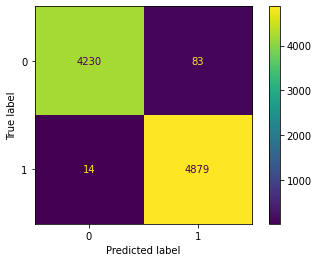

In [ ]:
print_confusion_matrix(ebm, train_set, train_label)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



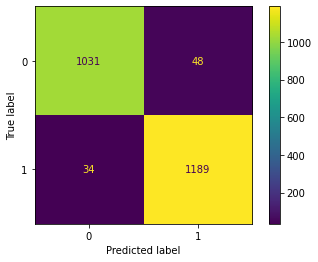

In [ ]:
print_confusion_matrix(ebm, test_set, test_label)

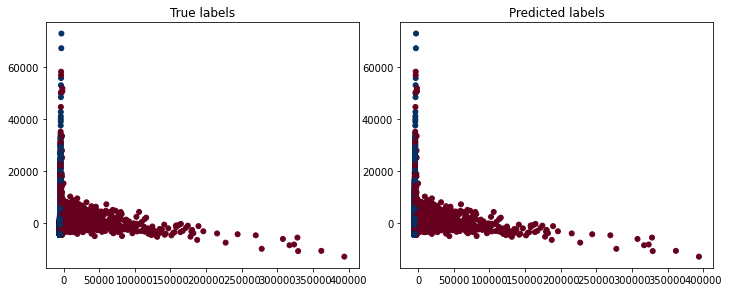

In [ ]:
print_scatter(train_set, train_label, train_pred)

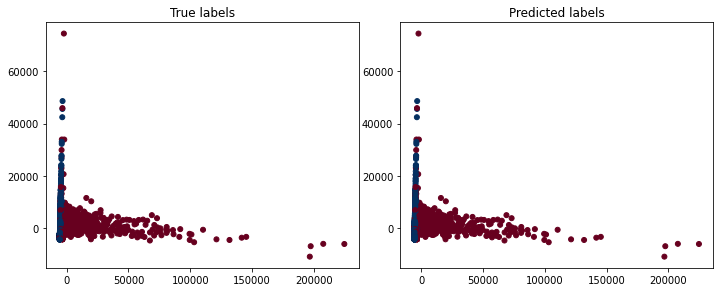

In [ ]:
print_scatter(test_set, test_label, test_pred)